In [1]:
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
mpl.rcParams["font.family"] = 'Arial'  #默认字体类型
mpl.rcParams["mathtext.fontset"] = 'cm' #数学文字字体
mpl.rcParams["contour.negative_linestyle"] = 'dashed'  #默认字体类型
import matplotlib.pyplot as plt
import os

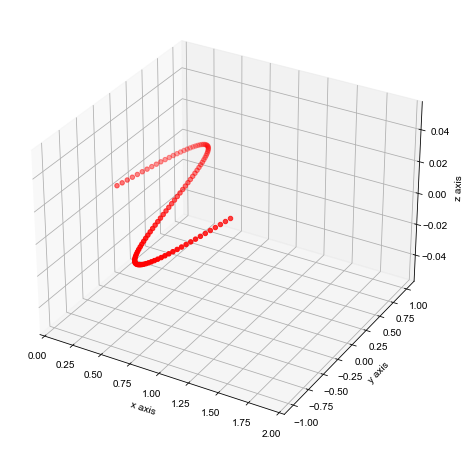

In [2]:
fig=plt.figure(figsize=(8,8))
ax=fig.gca(projection='3d')

x = np.linspace(0,1,100)
y=np.sin(x*2*np.pi)

# ax.plot(x,y)
ax.scatter(x,y, color='r')
# view
ax.view_init(30, -60)
# axis label
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
# 
ax.set_xlim(0,2)

plt.show()

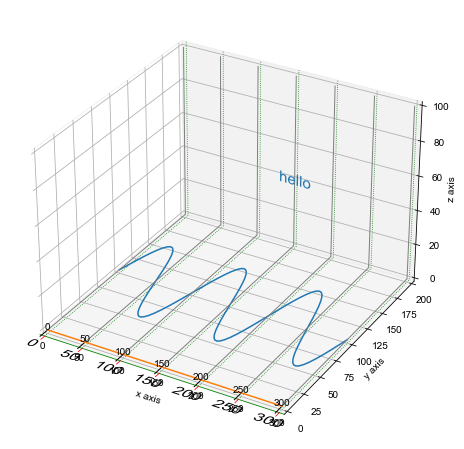

In [3]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

ax.view_init(elev=30, azim=-60)
x = np.linspace(0,300, 100)
y = np.sin(x*2*np.pi)*50 + 100
ax.plot(x,y)
ax.set_xlim(0, 300)
ax.set_ylim(0, 200)
ax.set_zlim(0, 100)
ax.set_xlabel('x axis', labelpad=-4)
ax.set_ylabel('y axis', labelpad=0)
ax.set_zlabel('z axis', labelpad=0)

ax.xaxis._axinfo['tick']['inward_factor']=0.3
ax.xaxis._axinfo['tick']['outward_factor']=0

ax.tick_params(axis='x',which='major', color='r', pad=-4)
# ax.xaxis.set_minor_locator(MultipleLocator(10))
# ax.tick_params(axis='x',which='minor', color='g', pad=-4)

ax.w_xaxis.line.set_color('g')

ax.xaxis.pane.set_facecolor('r')
ax.xaxis.pane.set_alpha(1)
# ax.xaxis.pane.set_edgecolor('k')
ax.xaxis.pane.fill=False

# ax.grid(False)
# print(ax.xaxis._axinfo)
ax.xaxis._axinfo['grid']['color']='g'
ax.xaxis._axinfo['grid']['linestyle']='dotted'

fig.canvas.draw()
from matplotlib.text import TextPath
from matplotlib.font_manager import FontProperties
from matplotlib.transforms import Affine2D
from mpl_toolkits.mplot3d import Axes3D, art3d
from matplotlib.patches import PathPatch
def text3d(ax, xyz, s, zdir="z", size=0.1, angle=0,font='Arial',weight='normal',ha='left',va='center', **kwargs):
    x, y, z = xyz
    xlim,ylim,zlim=ax.get_xlim(),ax.get_ylim(),ax.get_zlim()
    xmin,xmax,ymin,ymax,zmin,zmax=xlim[0],xlim[1],ylim[0],ylim[1],zlim[0],zlim[1]
    xlen,ylen,zlen=xmax-xmin, ymax-ymin, zmax-zmin
    minLen_axis=np.min([xlen,ylen,zlen])
    aspect=ax.get_box_aspect()
    fontscale=1
    if   zdir == "y": xy, z, fontscale = (x,z), y, (xlen/zlen)/(aspect[0]/aspect[2])
    elif zdir == "x": xy, z, fontscale = (y,z), x, (ylen/zlen)/(aspect[1]/aspect[2])
    else:             xy, z, fontscale = (x,y), z, (xlen/ylen)/(aspect[0]/aspect[1])
    path = TextPath((0, 0), s, size=size, prop = FontProperties(family=font,weight=weight))
    V = path.vertices
    if(ha=='center'):
        V[:,0] -= (V[:,0].max() - V[:,0].min())/2 # 居中
    elif(ha=='right'):
        V[:,0] -= V[:,0].max()
    if(va=='center'):
        V[:,1] -= (V[:,1].max() - V[:,1].min())/2 # 居中
    elif(va=='top'):
        V[:,1] -= V[:,1].max()
    trans = Affine2D().rotate(angle/180*np.pi).scale(1,1/fontscale).translate(xy[0], xy[1])
    path = PathPatch(trans.transform_path(path),clip_on=False, **kwargs)
    ax.add_patch(path)
    art3d.pathpatch_2d_to_3d(path, z=z, zdir=zdir)
    
xmin,xmax,ymin,ymax,zmin,zmax=ax.get_xlim()[0], ax.get_xlim()[1],ax.get_ylim()[0], ax.get_ylim()[1], ax.get_zlim()[0], ax.get_zlim()[1]
for tick,label in zip(ax.get_xticks(),ax.get_xticklabels()):
    ax.plot([tick, tick, tick],[ymin,ymax,ymax],[zmin,zmin,zmax],color="0.5",lw=1)
    ax.plot([tick, tick],[ymin,ymin-10],[zmin,zmin],color="k",lw=1)
    ax.text(tick, ymin, zmin, label.get_text(),ha='center')
    text3d(ax,(tick, ymin-15, zmin),label.get_text(),size=20,edgecolor='None',facecolor='k',ha='center',va='top')
ax.plot([xmin,xmax],[ymin,ymin],[zmin,zmin])
text3d(ax, (150, 200, 40),'hello',size=20,edgecolor='None',zdir='y',ha='center',va='center')


# ax.axis('off')
plt.savefig('test.pdf')
os.system('pdfcrop test.pdf test.pdf')
# os.system('open test.pdf')
plt.show()


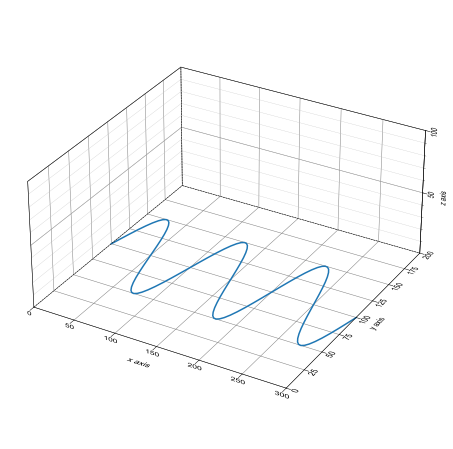

In [4]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

ax.view_init(elev=30, azim=-60)
x = np.linspace(0,300, 100)
y = np.sin(x*2*np.pi)*50 + 100
ax.plot(x,y)
ax.set_xlim(0, 300)
ax.set_ylim(0, 200)
ax.set_zlim(0.1, 100)
ax.set_xlabel('x axis', labelpad=-4)
ax.set_ylabel('y axis', labelpad=0)
ax.set_zlabel('z axis', labelpad=0)

ax.zaxis.set_major_locator(MultipleLocator(50))
ax.zaxis.set_minor_locator(MultipleLocator(10))

from nice import text3d, niceAxis

niceAxis(ax,scaled=False)

ax.set_box_aspect((4,4,2))

# ax.axis('off')
plt.savefig('test.pdf')
os.system('pdfcrop test.pdf test.pdf')
# os.system('open test.pdf')
plt.show()

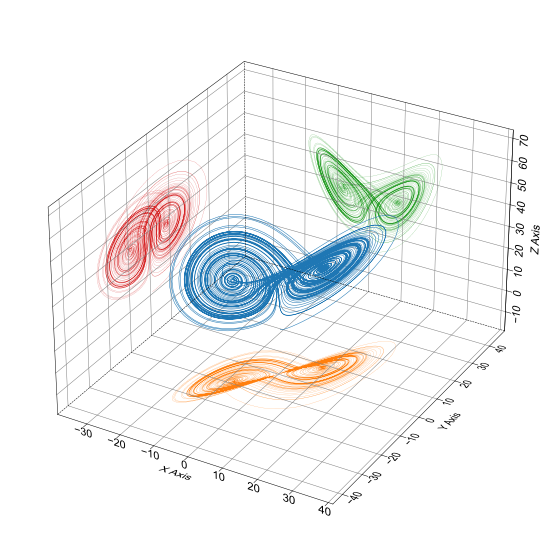

In [8]:
def lorenz(x, y, z, s=10, r=28, b=2.667):
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot
dt = 0.01
num_steps = 10000

# Need one more for the initial values
xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)

# Set initial values
xs[0], ys[0], zs[0] = (0., 1., 1.05)

# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)
    
# Plot
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")

ax.set_xlim(xs.min()-20,xs.max()+20)
ax.set_ylim(ys.min()-20,ys.max()+20)
ax.set_zlim(zs.min()-20,zs.max()+20)
# 设置坐标轴刻度间隔
ax.xaxis.set_major_locator(MultipleLocator(10))
# ax.xaxis.set_minor_locator(MultipleLocator(2))
ax.yaxis.set_major_locator(MultipleLocator(10))
# ax.yaxis.set_minor_locator(MultipleLocator(2))
ax.zaxis.set_major_locator(MultipleLocator(10))
# ax.zaxis.set_minor_locator(MultipleLocator(2))

# 重新自定义坐标轴属性
niceAxis(ax,fill_pane=False,label3D=True,fs_label=0.04,length_major=0.02,length_minor=0.01)

# 再添加几条曲线
ax.plot(xs, ys, ax.get_zlim()[0], lw=0.2,zorder=-400,ls='dashed')
ax.plot(xs, zs,ys*0+ax.get_ylim()[1],zdir='y', lw=0.2,zorder=-400,ls='dashed')
ax.plot(xs=xs*0+ax.get_xlim()[0], ys=ys, zs=zs, lw=0.2,zorder=-400,ls='dashed')

# savefig
# fname_fig=str('../../figures/Chapter4/Lecture4_1_example1.pdf')
# plt.savefig(fname_fig)
# os.system('pdfcrop '+fname_fig+' '+fname_fig)
plt.show()